# Лекция 12. Кластеризация. Метод K-средних

In [7]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#загрузка данных
laptops = pd.read_csv('/content/drive/MyDrive/Введение в ML ITHUB/lessons/data/laptop_price.csv', encoding='Windows-1251')
laptops.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#предобработка
laptops['Weight']=laptops['Weight'].str.replace('kg','').astype('float64')
ssd=[]
hdd=[]
fs=[]
for i in laptops['Memory']:
    if 'SSD' in i:
        ssd.append(1)
        hdd.append(0)
        fs.append(0)
    elif 'HDD' in i:
        ssd.append(0)
        hdd.append(1)
        fs.append(0)
    else:
        ssd.append(0)
        hdd.append(0)
        fs.append(1)
laptops['ssd']=ssd
laptops['hdd']=hdd
laptops['fs']=fs
s = [float(re.findall(r'\d+', s)[0]) for s in laptops['Memory']]
laptops['Memory']=s
laptops['Ram']=laptops['Ram'].str.replace('GB','').astype('int32')
laptops.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ssd,hdd,fs
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,No OS,1.86,575.00,1,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,macOS,1.83,2537.45,1,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1,0,0


In [4]:
laptops=laptops[['Inches','Memory','Ram','Weight','Price_euros','ssd','hdd','fs']]

## Задача кластеризации

Обучение без учителя (unsupervised learning, неконтролируемое обучение) – класс методов машинного обучения для поиска шаблонов в наборе данных. Данные, получаемые на вход таких алгоритмов обычно не размечены, то есть передаются только входные переменные X без соответствующих меток y. Если в контролируемом обучении (обучении с учителем, supervised learning) система пытается извлечь уроки из предыдущих примеров, то в обучении без учителя – система старается самостоятельно найти шаблоны непосредственно из приведенного примера.

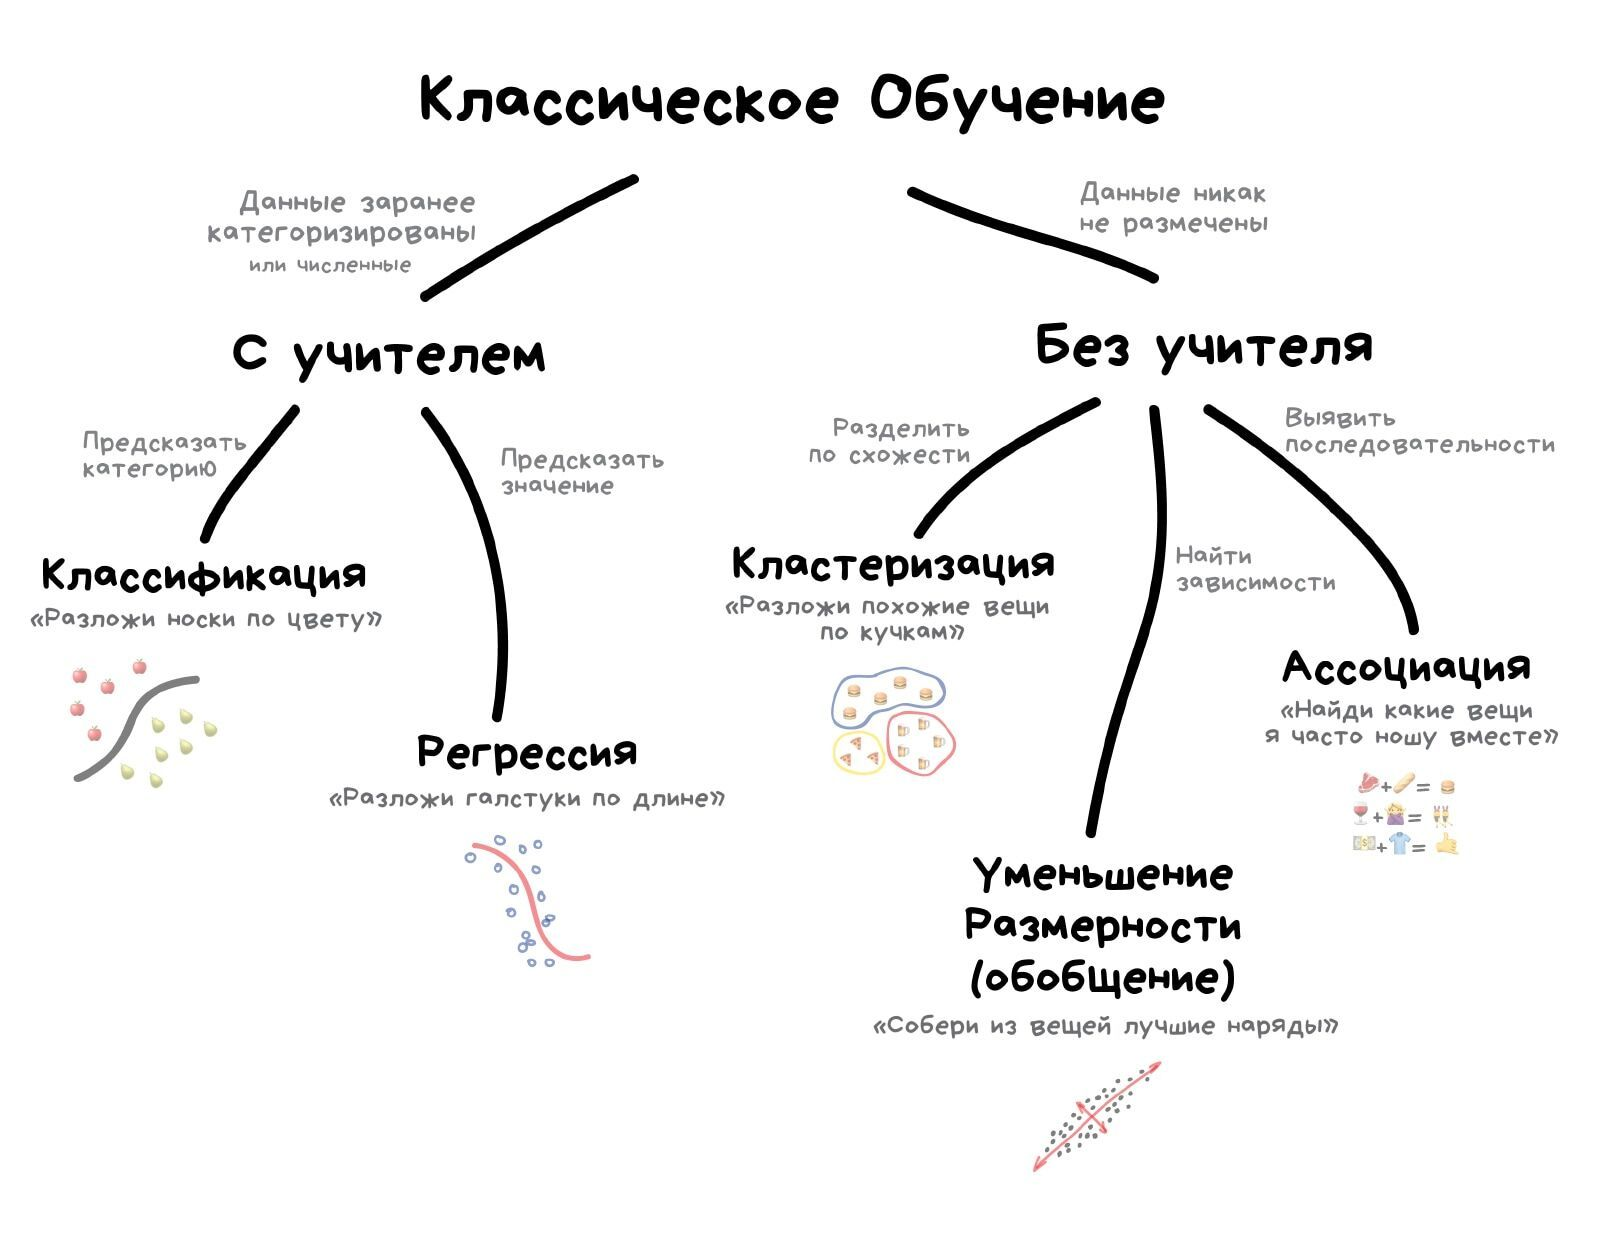

Что такое кластеризация?
По сути, это тип неконтролируемого метода обучения и распространенный метод статистического анализа данных, используемый во многих областях. Кластеризация главным образом является задачей разделения набора наблюдений на подмножества, называемые кластерами, таким образом, чтобы наблюдения в одном и том же кластере были похожи в одном смысле и не похожи на наблюдения в других кластерах. Проще говоря, мы можем сказать, что главная цель кластеризации – группировать данные на основе сходства и различий.

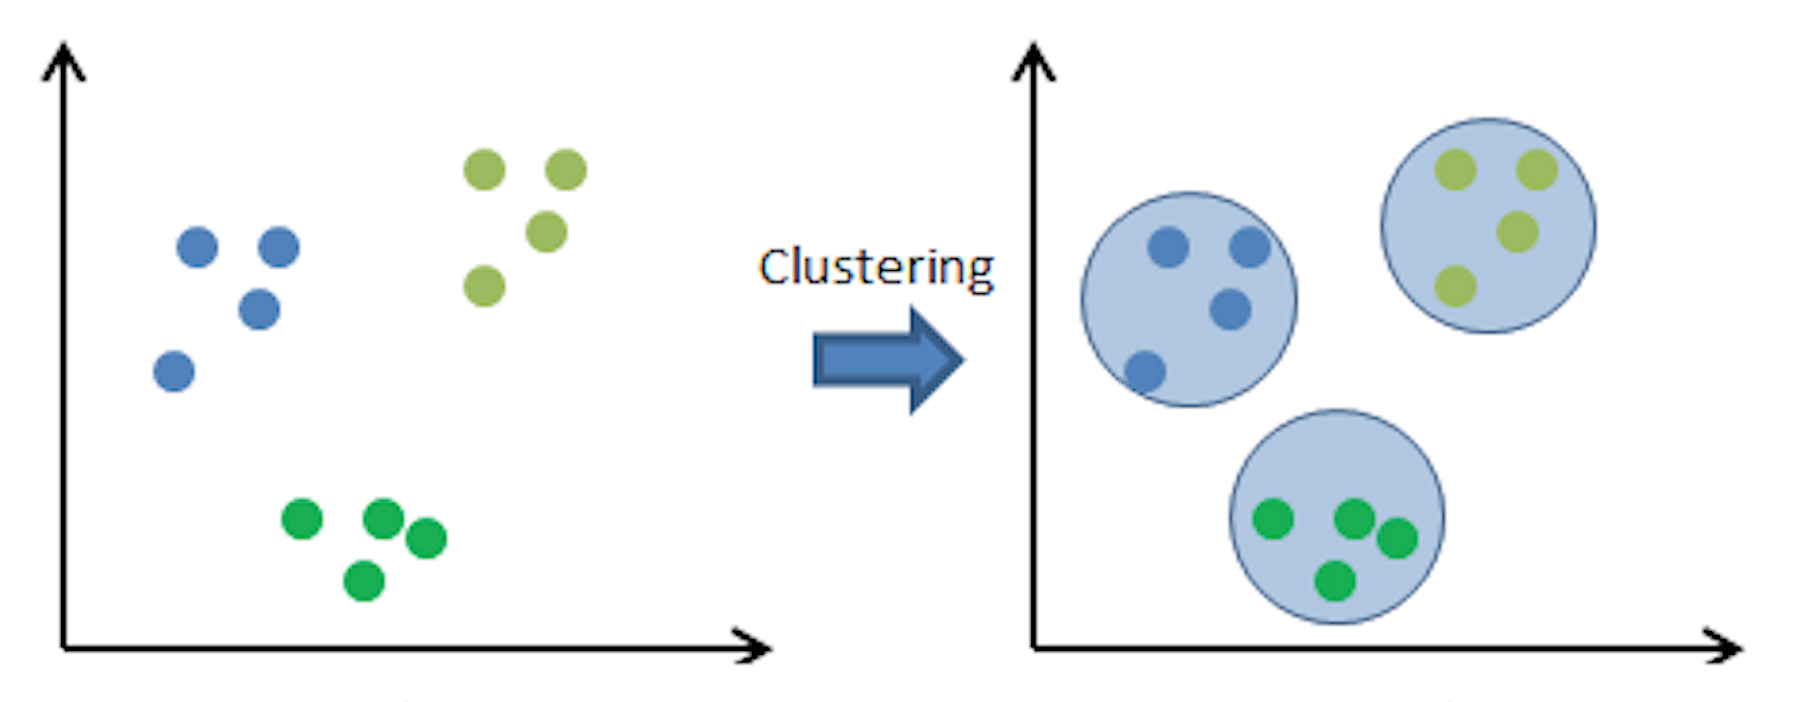

## Метод k-средних

Как работает k-means - https://proglib.io/p/obyasnite-tak-kak-budto-mne-10-let-prostoe-opisanie-populyarnogo-algoritma-klasterizacii-k-srednih-2022-12-07

А теперь возьмем наши ноутбуки. Попробуем по двум признакам разбить ноутбуки на кластеры

In [6]:
X=laptops[['Price_euros','Weight']]
X.head()

,Price_euros,Weight
0,1339.69,1.37
1,898.94,1.34
2,575.00,1.86
3,2537.45,1.83
4,1803.60,1.37


In [22]:
import random
fig = px.scatter(x=X['Price_euros'][:20], y=X['Weight'][:20])
fig.update_traces(marker=dict(size=25))
fig.show()

А теперь разобьем их на кластеры

In [ ]:
#обучение модели
model = KMeans(n_clusters=3)
model.fit(X[:20])

In [14]:
#предсказание - получаем кластеры
clusters = model.predict(X[:20])
clusters

array([0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1],
      dtype=int32)

In [23]:
fig = px.scatter(x=X['Price_euros'][:20], y=X['Weight'][:20],color=clusters)
fig.update_traces(marker=dict(size=25))
fig.show()

In [26]:
#возьмем 4 кластера
model = KMeans(n_clusters=4)
model.fit(X[:20])
clusters = model.predict(X[:20])
fig = px.scatter(x=X['Price_euros'][:20], y=X['Weight'][:20],color=clusters)
fig.update_traces(marker=dict(size=25))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Возьмем теперь все ноутбуки и с помощью PCA сожмем из до двух признаков.

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #рса на два компонента
pca.fit(laptops) #обучаем
reduced = pca.transform(laptops)

In [29]:
pca_df=pd.DataFrame(reduced)
pca_df.columns=['x','y']

In [31]:
fig = px.scatter(pca_df[:20], x="x", y="y")
fig.update_traces(marker_size=20)
fig.show()

In [33]:
model = KMeans(n_clusters=3)
model.fit(pca_df)
clusters = model.predict(pca_df)
fig = px.scatter(x=pca_df['x'][:20], y=pca_df['y'][:20],color=clusters[:20])
fig.update_traces(marker=dict(size=25))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ЛАБОРАТОРНАЯ РАБОТА - КЛАСТЕРИЗАЦИЯ

* критерии к данным аналогичны прошлым лабораторным
* выполнить кластеризацию на двух признаках с использованием не менее двух различных алгоритмов
* каждый результат кластеризации визуализировать
* в конце сделать PCA по всем признакам
* определить оптимальное количество кластеров
* выполнить кластеризацию